# Notebook 2: Merge Sort
## Author: Lincoln Steber
## Course: CS 2500 (Algorithms) @ Missouri S&T

### Prerequisite Packages

We will be using numpy, matplotlib library in this jupyter notebook.

In [23]:
# Install all the prerequisite packages from the Terminal
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import time
import numpy as np
import matplotlib.pyplot as plt
import copy
import random

## Merge Sort: Combine

In [25]:
def merge_print(A, p, q, r):
  n1 = q - p + 1
  n2 = r - q
  L = [0] * (n1)
  R = [0] * (n2)
  for i in range(n1):
      L[i] = A[p + i]
  for j in range(n2):
      R[j] = A[q + j + 1]
  L.append(float('inf'))
  R.append(float('inf'))
  i = 0
  j = 0
  for k in range(p, r + 1):
    if L[i] <= R[j]:
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1
  return A

## Merge Sort with print statements

In [26]:
def merge_sort_print(A, p, r):
  if p < r:
    q = (p + r)//2
    merge_sort_print(A, p, q)
    merge_sort_print(A, q + 1, r)
    ## print(merge_print(A, p, q, r))
    print(f"Loop : {merge_print(A, p, q, r)}")
  return A

## Check that the array is sorted correctly

In [27]:
def is_sorted(array):
    len_array = len(array)
    status = True
    i = 0
    while (i<len_array-1):
        if (array[i]>array[i+1]):
            status = False
        i = i + 1
    if (not status):
        print("Array is not sorted \n")
    else:
        print("Array is sorted \n")

## Test input for insertion_sort_print and is_sorted functions

In [28]:
array =  [5, 2, 4, 6, 1, 3]

print(f"Input : {array}")
is_sorted(array)

array_out = merge_sort_print(array, 0, len(array) - 1)

print(f"\nOutput : {array}")
is_sorted(array_out)

##length = random.randint(1, 10) # Random length between 1 and 100
##array = np.random.randint(0, 20, length)

##print(f"Input : {array}")
##is_sorted(array)

##array_out = merge_sort_print(array, 0, len(array) - 1)

##print(f"\nOutput : {array}")
##is_sorted(array_out)

Input : [5, 2, 4, 6, 1, 3]
Array is not sorted 

Loop : [2, 5, 4, 6, 1, 3]
Loop : [2, 4, 5, 6, 1, 3]
Loop : [2, 4, 5, 1, 6, 3]
Loop : [2, 4, 5, 1, 3, 6]
Loop : [1, 2, 3, 4, 5, 6]

Output : [1, 2, 3, 4, 5, 6]
Array is sorted 



## Plotting Run-Time Complexity

In [29]:
def merge(A, p, q, r):
  n1 = q - p + 1
  n2 = r - q
  L = [0] * (n1)
  R = [0] * (n2)
  for i in range(n1):
      L[i] = A[p + i]
  for j in range(n2):
      R[j] = A[q + j + 1]
  L.append(float('inf'))
  R.append(float('inf'))
  i = 0
  j = 0
  for k in range(p, r + 1):
    if L[i] <= R[j]:
      A[k] = L[i]
      i += 1
    else:
      A[k] = R[j]
      j += 1

In [30]:
def merge_sort(A, p, r):
  if p < r:
    q = (p + r)//2
    merge_sort(A, p, q)
    merge_sort(A, q + 1, r)
    merge(A, p, q, r)
  return A

In [31]:
# Generate a random array of given size.
def generate_random_input(size):
    arr = np.random.randint(0, 20000, size = size)
    return arr

In [32]:
# Number of random arrays generated in this experiment
monte_carlo_runs = 500

# Range of array sizes considered
start_array = 10
end_array = 200
increments = 10

# Initiate average and worst case run-time
avg_time_taken = [0]*(end_array//increments)
worst_time_taken = [0]*(end_array//increments)

# Run-time experiments for random arrays of a given size
count = 0
for curr_array_size in range(start_array, end_array+1, increments):  
    run_times = []
    # Given a fixed array size, generate one random array and compute its run-time
    for iteration in range(monte_carlo_runs):             
        array = generate_random_input(curr_array_size)    # Generate random array
        start = time.time()                               # Record state time
        merge_sort(array, 0, len(array) - 1)
        end = time.time()                                 # Record end time
        run_times.append(end - start)                     # Instantaneous ruun-time for a specific random input         

    avg_time_taken[count] = sum(run_times)/len(run_times) # Empirical average of run-time
    worst_time_taken[count] = max(run_times)              # Worst case run time across various random experiments
    count += 1
#print(time_taken)

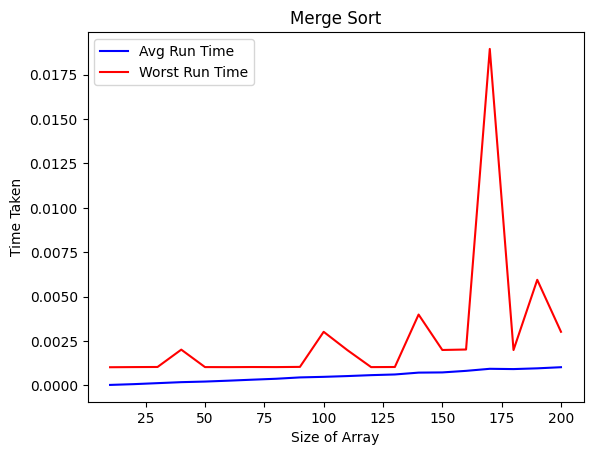

In [33]:
# Data Coordinates
x = np.arange(start_array, end_array+1, increments)
y = np.array(avg_time_taken)
z = np.array(worst_time_taken)

# Plot
plt.plot(x,y,'b',label='Avg Run Time') 
plt.plot(x,z,'r',label='Worst Run Time') 

# Add Title
plt.title("Merge Sort")

# Add Axes Labels
plt.xlabel("Size of Array") 
plt.ylabel("Time Taken") 

# Display
plt.legend()
plt.show()

### References
1. [Big o cheat sheet](https://www.bigocheatsheet.com/)
2. [Timeit example](https://www.geeksforgeeks.org/timeit-python-examples/)